#### **Escuela Politecnica Nacional del Ecuador**
#### **Integrantes:** Moisés Pineda, Sebastián Morales
#### **Fecha:** 09/06/2025

##### **Repositorio:** https://github.com/SantiagoTmg/Metodos_Numericos_GRCC1/tree/main/Talleres/Taller5

#### **[Taller 5] Mínimos Cuadrados**

##### **A)  Interpole los puntos:**
##### $p1 = (5.4, 3.2)$
##### $p2_i = (9.5, 0.7)$
##### $p3 = (12.3, -3.6)$
##### **De estos, el punto p2i debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Puntos fijos
p1 = (5.4, 3.2)
p3 = (12.3, -3.6)

# Función para interpolación cuadrática (ax² + bx + c)
def quadratic_interpolation(p1, p2, p3):
    x = np.array([p1[0], p2[0], p3[0]])
    y = np.array([p1[1], p2[1], p3[1]])
    A = np.vstack([x**2, x, np.ones(len(x))]).T
    a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return a, b, c

# Función para graficar con parábola interpolada
def graficar_parabola(p2_x=9.5, p2_y=0.7):
    p2 = (p2_x, p2_y)
    
    a, b, c = quadratic_interpolation(p1, p2, p3)
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(*p1, color='blue', s=100, label='P1 (fijo)')
    plt.scatter(*p2, color='red', s=100, label='P2 (movible)')
    plt.scatter(*p3, color='green', s=100, label='P3 (fijo)')
    
    x_vals = np.linspace(4, 14, 100)
    y_vals = a * x_vals**2 + b * x_vals + c
    plt.plot(x_vals, y_vals, 'r-', label=f'Parábola: y = {a:.2f}x² + {b:.2f}x + {c:.2f}')
    
    plt.xlim(4, 14)
    plt.ylim(-5, 5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación Cuadrática Interactiva')
    plt.grid(True)
    plt.legend()
    plt.show()

# Interfaz interactiva
interact(
    graficar_parabola,
    p2_x=(5.5, 12.3, 0.1),
    p2_y=(-5.0, 5.0, 0.1)  
)

interactive(children=(FloatSlider(value=9.5, description='p2_x', max=12.3, min=5.5), FloatSlider(value=0.7, de…

<function __main__.graficar_parabola(p2_x=9.5, p2_y=0.7)>

#### **B) Interpole el siguiente conjunto de datos:** 
```python
xs = [
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 
    0.9070, 1.0367, 1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 
    2.0114, 2.0557, 2.1610, 2.6344
]
ys = [
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 
    1.2887, 3.1239, 2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 
    10.5890, 11.5865, 11.8221, 26.5077
]

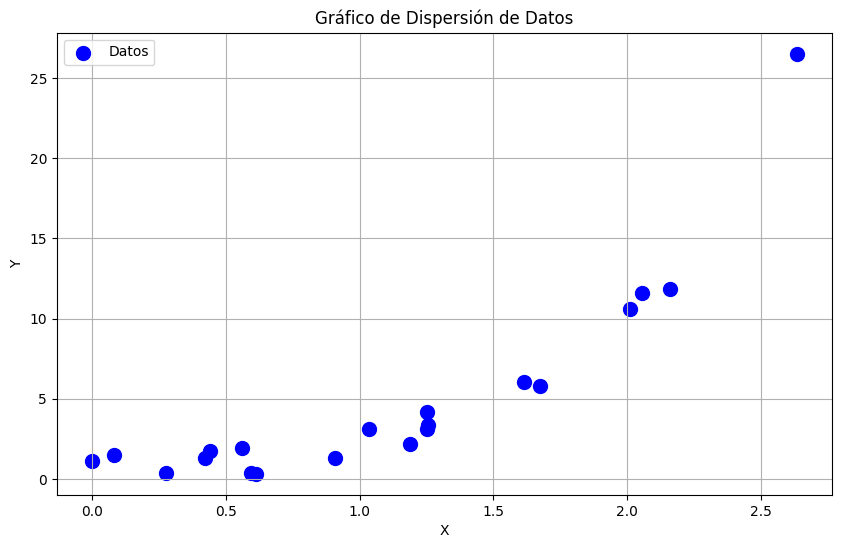

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#Conjunto de datos para el gráfico
xs = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

# Crear el gráfico
plt.figure(figsize=(10, 6)) 
plt.scatter(xs, ys, color='blue', label='Datos', s=100)
plt.title('Gráfico de Dispersión de Datos')     
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

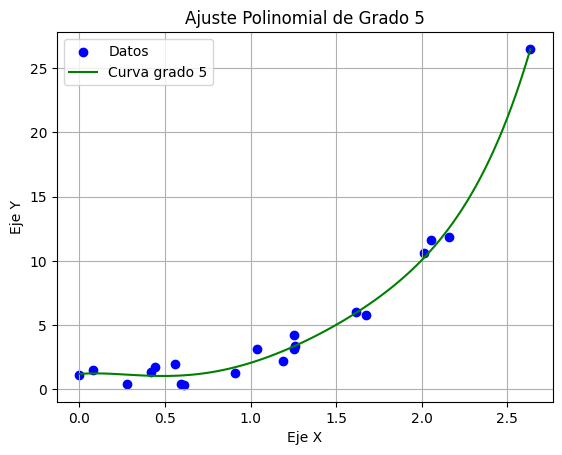

1.189 x^5 + -6.362 x^4 + 12.669 x^3 + -7.745 x^2 + 1.116 x + 1.186


In [21]:
from scipy.optimize import curve_fit

# Definir x_interp como en el anterior
x_interp = np.linspace(min(xs), max(xs), 100)

# Definición de la función de quinto grado
def poly5_function(x, a5, a4, a3, a2, a1, a0):
    return a5 * x**5 + a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

# Ajuste del modelo
coeffs5, _ = curve_fit(poly5_function, xs, ys)
a5, a4, a3, a2, a1, a0 = coeffs5

# Definir la función ajustada
def adjusted_poly5(x):
    return a5 * x**5 + a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

# Generar valores interpolados
y_interp5 = adjusted_poly5(x_interp)

# Graficar los datos y la curva ajustada
plt.scatter(xs, ys, color="blue", label="Datos")
plt.plot(x_interp, y_interp5, color="green", label="Curva grado 5")
plt.title("Ajuste Polinomial de Grado 5")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid(True)
plt.legend()
plt.show()

# Imprimir resultados
print(f'{round(a5, 3)} x^5 + {round(a4, 3)} x^4 + {round(a3, 3)} x^3 + {round(a2, 3)} x^2 + {round(a1, 3)} x + {round(a0, 3)}')